In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
import os

In [2]:
tf.set_random_seed(777)

In [3]:
def Normalized(data):
    
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)

In [4]:
timesteps = seq_length = 7
print(timesteps,seq_length)

7 7


In [5]:
data_dimension = 5
hidden_dimen = 10
output_dimen = 1
learning_rate = 0.01
iterations = 500

In [6]:
xy = np.loadtxt('./input/data_stock_daily.csv',delimiter=',')
print(xy)

[[  8.28659973e+02   8.33450012e+02   8.28349976e+02   1.24770000e+06
    8.31659973e+02]
 [  8.23020020e+02   8.28070007e+02   8.21655029e+02   1.59780000e+06
    8.28070007e+02]
 [  8.19929993e+02   8.24400024e+02   8.18979980e+02   1.28170000e+06
    8.24159973e+02]
 ..., 
 [  5.66892592e+02   5.67002574e+02   5.56932537e+02   1.08000000e+04
    5.56972503e+02]
 [  5.61202549e+02   5.66432590e+02   5.58672539e+02   4.12000000e+04
    5.59992565e+02]
 [  5.68002570e+02   5.68002570e+02   5.52922516e+02   1.31000000e+04
    5.58462551e+02]]


In [7]:
xy = xy[::-1]
print(xy)

[[  5.68002570e+02   5.68002570e+02   5.52922516e+02   1.31000000e+04
    5.58462551e+02]
 [  5.61202549e+02   5.66432590e+02   5.58672539e+02   4.12000000e+04
    5.59992565e+02]
 [  5.66892592e+02   5.67002574e+02   5.56932537e+02   1.08000000e+04
    5.56972503e+02]
 ..., 
 [  8.19929993e+02   8.24400024e+02   8.18979980e+02   1.28170000e+06
    8.24159973e+02]
 [  8.23020020e+02   8.28070007e+02   8.21655029e+02   1.59780000e+06
    8.28070007e+02]
 [  8.28659973e+02   8.33450012e+02   8.28349976e+02   1.24770000e+06
    8.31659973e+02]]


In [8]:
xy = Normalized(xy)
print(xy)

[[  2.13751054e-01   2.08179810e-01   1.91791832e-01   4.66075110e-04
    1.92092403e-01]
 [  1.93935034e-01   2.03641926e-01   2.08664571e-01   2.98467330e-03
    1.96551555e-01]
 [  2.10516454e-01   2.05289413e-01   2.03558748e-01   2.59926504e-04
    1.87749731e-01]
 ..., 
 [  9.47895670e-01   9.49273354e-01   9.72504893e-01   1.14170476e-01
    9.66454635e-01]
 [  9.56900354e-01   9.59881106e-01   9.80354497e-01   1.42502465e-01
    9.77850239e-01]
 [  9.73335806e-01   9.75431522e-01   1.00000000e+00   1.11123062e-01
    9.88313020e-01]]


In [9]:
x = xy
y = xy[:,[-1]]
print(y)

[[ 0.1920924 ]
 [ 0.19655155]
 [ 0.18774973]
 [ 0.21744815]
 [ 0.21698189]
 [ 0.22496747]
 [ 0.14744274]
 [ 0.13289962]
 [ 0.18171679]
 [ 0.2086465 ]
 [ 0.14106001]
 [ 0.11089532]
 [ 0.11649107]
 [ 0.12791587]
 [ 0.18649648]
 [ 0.12692483]
 [ 0.10512477]
 [ 0.12316526]
 [ 0.10022843]
 [ 0.09504062]
 [ 0.06886882]
 [ 0.07169585]
 [ 0.10244347]
 [ 0.09941237]
 [ 0.11308129]
 [ 0.10311379]
 [ 0.102764  ]
 [ 0.06583772]
 [ 0.05074084]
 [ 0.05377184]
 [ 0.07630073]
 [ 0.1089136 ]
 [ 0.11815244]
 [ 0.0993833 ]
 [ 0.07994365]
 [ 0.08183815]
 [ 0.10582417]
 [ 0.1084764 ]
 [ 0.13520206]
 [ 0.15303849]
 [ 0.17530499]
 [ 0.21392171]
 [ 0.20147697]
 [ 0.19681376]
 [ 0.19626009]
 [ 0.17888975]
 [ 0.1526887 ]
 [ 0.15187264]
 [ 0.17880235]
 [ 0.18588448]
 [ 0.2027593 ]
 [ 0.19818349]
 [ 0.19319974]
 [ 0.17137043]
 [ 0.17256536]
 [ 0.1507653 ]
 [ 0.14706388]
 [ 0.17725764]
 [ 0.18171679]
 [ 0.18597188]
 [ 0.21100727]
 [ 0.21004549]
 [ 0.2509354 ]
 [ 0.24321202]
 [ 0.24682604]
 [ 0.24111364]
 [ 0.26265

In [10]:
data_x = []
data_y = []

In [11]:
for i in range(0,len(y) - seq_length):
    _x = x[i:i + seq_length]
    _y = y[i + seq_length]
    print(_x, "->", _y)
    data_x.append(_x)
    data_y.append(_y)

[[  2.13751054e-01   2.08179810e-01   1.91791832e-01   4.66075110e-04
    1.92092403e-01]
 [  1.93935034e-01   2.03641926e-01   2.08664571e-01   2.98467330e-03
    1.96551555e-01]
 [  2.10516454e-01   2.05289413e-01   2.03558748e-01   2.59926504e-04
    1.87749731e-01]
 [  1.86678765e-01   2.09480567e-01   2.08781843e-01   0.00000000e+00
    2.17448151e-01]
 [  3.06973882e-01   3.14634137e-01   2.18993665e-01   1.24764722e-02
    2.16981885e-01]
 [  2.19142110e-01   2.63907214e-01   2.24686396e-01   4.56323384e-01
    2.24967473e-01]
 [  2.33129931e-01   2.36419163e-01   1.62682724e-01   5.70171193e-01
    1.47442742e-01]] -> [ 0.13289962]
[[  1.93935034e-01   2.03641926e-01   2.08664571e-01   2.98467330e-03
    1.96551555e-01]
 [  2.10516454e-01   2.05289413e-01   2.03558748e-01   2.59926504e-04
    1.87749731e-01]
 [  1.86678765e-01   2.09480567e-01   2.08781843e-01   0.00000000e+00
    2.17448151e-01]
 [  3.06973882e-01   3.14634137e-01   2.18993665e-01   1.24764722e-02
    2.169818

 [ 0.04024406  0.06143311  0.05543067  0.1804607   0.05377184]] -> [ 0.07630073]
[[ 0.09459257  0.10681264  0.10657706  0.17008156  0.11308129]
 [ 0.11397145  0.10990542  0.11165361  0.15063189  0.10311379]
 [ 0.08791917  0.09516437  0.09906505  0.09108183  0.102764  ]
 [ 0.08911395  0.08912336  0.08069577  0.15067671  0.06583772]
 [ 0.06160452  0.05984329  0.0461873   0.28828538  0.05074084]
 [ 0.04024406  0.06143311  0.05543067  0.1804607   0.05377184]
 [ 0.04691738  0.06915044  0.0488283   0.21793493  0.07630073]] -> [ 0.1089136]
[[ 0.11397145  0.10990542  0.11165361  0.15063189  0.10311379]
 [ 0.08791917  0.09516437  0.09906505  0.09108183  0.102764  ]
 [ 0.08911395  0.08912336  0.08069577  0.15067671  0.06583772]
 [ 0.06160452  0.05984329  0.0461873   0.28828538  0.05074084]
 [ 0.04024406  0.06143311  0.05543067  0.1804607   0.05377184]
 [ 0.04691738  0.06915044  0.0488283   0.21793493  0.07630073]
 [ 0.08410171  0.09889293  0.09228669  0.17070897  0.1089136 ]] -> [ 0.11815244]
[[

 [ 0.13652679  0.15213451  0.15021145  0.16209555  0.15187264]] -> [ 0.17880235]
[[ 0.20375565  0.20771739  0.21550166  0.1473604   0.20147697]
 [ 0.20020037  0.19661804  0.20878184  0.12065968  0.19681376]
 [ 0.19276932  0.18895855  0.20056566  0.15803531  0.19626009]
 [ 0.19247789  0.18765779  0.17069346  0.12791073  0.17888975]
 [ 0.16418175  0.16291579  0.16136218  0.16659496  0.1526887 ]
 [ 0.13652679  0.15213451  0.15021145  0.16209555  0.15187264]
 [ 0.15080604  0.17045976  0.16693746  0.15068567  0.17880235]] -> [ 0.18588448]
[[ 0.20020037  0.19661804  0.20878184  0.12065968  0.19681376]
 [ 0.19276932  0.18895855  0.20056566  0.15803531  0.19626009]
 [ 0.19247789  0.18765779  0.17069346  0.12791073  0.17888975]
 [ 0.16418175  0.16291579  0.16136218  0.16659496  0.1526887 ]
 [ 0.13652679  0.15213451  0.15021145  0.16209555  0.15187264]
 [ 0.15080604  0.17045976  0.16693746  0.15068567  0.17880235]
 [ 0.18478466  0.17944902  0.18008365  0.15495205  0.18588448]] -> [ 0.2027593]
[[

 [ 0.2241836   0.23338424  0.24008019  0.09938155  0.24344515]] -> [ 0.2289311]
[[ 0.24382483  0.25558275  0.26142496  0.12906695  0.26265148]
 [ 0.2584829   0.25858884  0.27239951  0.09396791  0.26167525]
 [ 0.2584829   0.25734593  0.27395479  0.06329659  0.26865535]
 [ 0.25967769  0.26145023  0.27005206  0.09471184  0.26142749]
 [ 0.24190148  0.24150066  0.23056986  0.17044008  0.22890203]
 [ 0.2241836   0.23338424  0.24008019  0.09938155  0.24344515]
 [ 0.2076605   0.2330085   0.22726858  0.12089271  0.2289311 ]] -> [ 0.25248011]
[[ 0.2584829   0.25858884  0.27239951  0.09396791  0.26167525]
 [ 0.2584829   0.25734593  0.27395479  0.06329659  0.26865535]
 [ 0.25967769  0.26145023  0.27005206  0.09471184  0.26142749]
 [ 0.24190148  0.24150066  0.23056986  0.17044008  0.22890203]
 [ 0.2241836   0.23338424  0.24008019  0.09938155  0.24344515]
 [ 0.2076605   0.2330085   0.22726858  0.12089271  0.2289311 ]
 [ 0.22514527  0.24532174  0.24607805  0.14464462  0.25248011]] -> [ 0.26906329]
[[

 [ 0.2008123   0.21468325  0.21359439  0.13326163  0.22214044]] -> [ 0.21954654]
[[ 0.22074496  0.23118765  0.22093021  0.17453617  0.21427133]
 [ 0.21678179  0.22942447  0.22459822  0.12722058  0.23490589]
 [ 0.21972496  0.21968373  0.22022603  0.13832571  0.21135689]
 [ 0.19562528  0.215984    0.2125673   0.118885    0.21515748]
 [ 0.21375105  0.21364271  0.21579512  0.0988617   0.20637314]
 [ 0.2008123   0.21468325  0.21359439  0.13326163  0.22214044]
 [ 0.21955018  0.21537688  0.23017367  0.10816528  0.21954654]] -> [ 0.20453714]
[[ 0.21678179  0.22942447  0.22459822  0.12722058  0.23490589]
 [ 0.21972496  0.21968373  0.22022603  0.13832571  0.21135689]
 [ 0.19562528  0.215984    0.2125673   0.118885    0.21515748]
 [ 0.21375105  0.21364271  0.21579512  0.0988617   0.20637314]
 [ 0.2008123   0.21468325  0.21359439  0.13326163  0.22214044]
 [ 0.21955018  0.21537688  0.23017367  0.10816528  0.21954654]
 [ 0.20360994  0.20210996  0.21514948  0.13750112  0.20453714]] -> [ 0.23965633]
[

 [ 0.24874968  0.26460085  0.26766042  0.1510173   0.26877183]] -> [ 0.28188707]
[[ 0.25309166  0.25298141  0.26227587  0.08688716  0.26390473]
 [ 0.24976967  0.24809662  0.26028042  0.10872995  0.25880451]
 [ 0.25163471  0.24760519  0.2549986   0.14284306  0.2421045 ]
 [ 0.22814676  0.22826824  0.23665859  0.14247558  0.23476016]
 [ 0.22762223  0.24720044  0.24971659  0.13197096  0.25472422]
 [ 0.24874968  0.26460085  0.26766042  0.1510173   0.26877183]
 [ 0.26911948  0.27043949  0.28592698  0.12876221  0.28188707]] -> [ 0.30173448]
[[ 0.24976967  0.24809662  0.26028042  0.10872995  0.25880451]
 [ 0.25163471  0.24760519  0.2549986   0.14284306  0.2421045 ]
 [ 0.22814676  0.22826824  0.23665859  0.14247558  0.23476016]
 [ 0.22762223  0.24720044  0.24971659  0.13197096  0.25472422]
 [ 0.24874968  0.26460085  0.26766042  0.1510173   0.26877183]
 [ 0.26911948  0.27043949  0.28592698  0.12876221  0.28188707]
 [ 0.28223302  0.29049908  0.29913189  0.33420274  0.30173448]] -> [ 0.27634948]
[

 [ 0.18111292  0.17580715  0.16576382  0.18143766  0.15554499]] -> [ 0.14423684]
[[ 0.16129672  0.168263    0.17436146  0.15798154  0.16548323]
 [ 0.15823691  0.16424538  0.16417909  0.1297571   0.16833952]
 [ 0.1885438   0.18381354  0.19716166  0.18168863  0.19389933]
 [ 0.17732454  0.1789866   0.19270147  0.12317827  0.1826495 ]
 [ 0.1700392   0.17204958  0.18116928  0.11080936  0.17941435]
 [ 0.18111292  0.17580715  0.16576382  0.18143766  0.15554499]
 [ 0.14818319  0.14714854  0.15672581  0.11878641  0.14423684]] -> [ 0.141235]
[[ 0.15823691  0.16424538  0.16417909  0.1297571   0.16833952]
 [ 0.1885438   0.18381354  0.19716166  0.18168863  0.19389933]
 [ 0.17732454  0.1789866   0.19270147  0.12317827  0.1826495 ]
 [ 0.1700392   0.17204958  0.18116928  0.11080936  0.17941435]
 [ 0.18111292  0.17580715  0.16576382  0.18143766  0.15554499]
 [ 0.14818319  0.14714854  0.15672581  0.11878641  0.14423684]
 [ 0.15025225  0.14519749  0.14997672  0.14572018  0.141235  ]] -> [ 0.16012061]
[[ 

 [ 0.05930252  0.05838367  0.03958493  0.25920946  0.02742505]] -> [ 0.02491864]
[[ 0.10939618  0.11418325  0.12456776  0.20351349  0.11010852]
 [ 0.09744835  0.10166781  0.11611379  0.07782558  0.11037073]
 [ 0.10665704  0.10585879  0.11221106  0.12192346  0.09865464]
 [ 0.10012935  0.10201454  0.10722269  0.1290311   0.09402068]
 [ 0.08337314  0.08195512  0.07482695  0.18391145  0.0621363 ]
 [ 0.05930252  0.05838367  0.03958493  0.25920946  0.02742505]
 [ 0.03598946  0.03256929  0.03547675  0.18437752  0.02491864]] -> [ 0.02952353]
[[ 0.09744835  0.10166781  0.11611379  0.07782558  0.11037073]
 [ 0.10665704  0.10585879  0.11221106  0.12192346  0.09865464]
 [ 0.10012935  0.10201454  0.10722269  0.1290311   0.09402068]
 [ 0.08337314  0.08195512  0.07482695  0.18391145  0.0621363 ]
 [ 0.05930252  0.05838367  0.03958493  0.25920946  0.02742505]
 [ 0.03598946  0.03256929  0.03547675  0.18437752  0.02491864]
 [ 0.00973322  0.02168975  0.01009428  0.29986556  0.02952353]] -> [ 0.01055033]
[

 [ 0.097186    0.10817125  0.10475778  0.18201129  0.10693169]] -> [ 0.0880459]
[[ 0.10292681  0.10036705  0.08988032  0.16994712  0.07600928]
 [ 0.08197432  0.07808186  0.06584776  0.15021063  0.05085741]
 [ 0.04764595  0.04368588  0.04002511  0.37450928  0.05278089]
 [ 0.06180855  0.12687224  0.08204559  0.50178363  0.12232013]
 [ 0.10805568  0.10701502  0.09093687  0.25471901  0.10471665]
 [ 0.097186    0.10817125  0.10475778  0.18201129  0.10693169]
 [ 0.10079959  0.106067    0.09891833  0.14840011  0.0880459 ]] -> [ 0.10209368]
[[ 0.08197432  0.07808186  0.06584776  0.15021063  0.05085741]
 [ 0.04764595  0.04368588  0.04002511  0.37450928  0.05278089]
 [ 0.06180855  0.12687224  0.08204559  0.50178363  0.12232013]
 [ 0.10805568  0.10701502  0.09093687  0.25471901  0.10471665]
 [ 0.097186    0.10817125  0.10475778  0.18201129  0.10693169]
 [ 0.10079959  0.106067    0.09891833  0.14840011  0.0880459 ]
 [ 0.08491767  0.09400814  0.10132451  0.16508022  0.10209368]] -> [ 0.11206117]
[[

 [ 0.09019209  0.11594643  0.10839633  0.14979833  0.12482645]] -> [ 0.12071709]
[[ 0.12752213  0.13898311  0.14598599  0.14675988  0.13587239]
 [ 0.12122754  0.12022427  0.11893681  0.23269696  0.11028333]
 [ 0.09922599  0.1120155   0.10464033  0.20712557  0.11652032]
 [ 0.10272295  0.11450115  0.12339107  0.11579278  0.12022156]
 [ 0.09910935  0.09788123  0.09815542  0.19215739  0.09180565]
 [ 0.09019209  0.11594643  0.10839633  0.14979833  0.12482645]
 [ 0.12489946  0.1254848   0.13531944  0.16463207  0.12071709]] -> [ 0.13644068]
[[ 0.12122754  0.12022427  0.11893681  0.23269696  0.11028333]
 [ 0.09922599  0.1120155   0.10464033  0.20712557  0.11652032]
 [ 0.10272295  0.11450115  0.12339107  0.11579278  0.12022156]
 [ 0.09910935  0.09788123  0.09815542  0.19215739  0.09180565]
 [ 0.09019209  0.11594643  0.10839633  0.14979833  0.12482645]
 [ 0.12489946  0.1254848   0.13531944  0.16463207  0.12071709]
 [ 0.11583649  0.13036959  0.12967071  0.14211706  0.13644068]] -> [ 0.15869256]
[

 [ 0.11460543  0.12914852  0.13344896  0.17558483  0.13059   ]] -> [ 0.1361567]
[[ 0.10766983  0.10761211  0.11061959  0.14576499  0.10634174]
 [ 0.10463922  0.11082924  0.12058186  0.11153536  0.10803217]
 [ 0.11399358  0.12435052  0.13160029  0.12512324  0.13362114]
 [ 0.12975885  0.12514245  0.12564359  0.17597921  0.12036025]
 [ 0.10886472  0.11226863  0.12115391  0.17885632  0.11584288]
 [ 0.11460543  0.12914852  0.13344896  0.17558483  0.13059   ]
 [ 0.1277481   0.13568087  0.13324944  0.12753428  0.1361567 ]] -> [ 0.1455995]
[[ 0.10463922  0.11082924  0.12058186  0.11153536  0.10803217]
 [ 0.11399358  0.12435052  0.13160029  0.12512324  0.13362114]
 [ 0.12975885  0.12514245  0.12564359  0.17597921  0.12036025]
 [ 0.10886472  0.11226863  0.12115391  0.17885632  0.11584288]
 [ 0.11460543  0.12914852  0.13344896  0.17558483  0.13059   ]
 [ 0.1277481   0.13568087  0.13324944  0.12753428  0.1361567 ]
 [ 0.12617455  0.13834018  0.14207603  0.13039347  0.1455995 ]] -> [ 0.13860474]
[[ 

 [ 0.12401813  0.12218271  0.13336102  0.16900601  0.12863737]] -> [ 0.13300904]
[[ 0.10766983  0.1073549   0.12499794  0.08496011  0.1159304 ]
 [ 0.0971791   0.0934231   0.10692225  0.14563055  0.10097925]
 [ 0.09834482  0.09729633  0.11149987  0.09535717  0.10374802]
 [ 0.10117142  0.10116938  0.11014999  0.11529085  0.10698302]
 [ 0.10592144  0.12189374  0.12684661  0.16359236  0.12875388]
 [ 0.12401813  0.12218271  0.13336102  0.16900601  0.12863737]
 [ 0.13095373  0.13805103  0.14662446  0.1113561   0.13300904]] -> [ 0.13968307]
[[ 0.0971791   0.0934231   0.10692225  0.14563055  0.10097925]
 [ 0.09834482  0.09729633  0.11149987  0.09535717  0.10374802]
 [ 0.10117142  0.10116938  0.11014999  0.11529085  0.10698302]
 [ 0.10592144  0.12189374  0.12684661  0.16359236  0.12875388]
 [ 0.12401813  0.12218271  0.13336102  0.16900601  0.12863737]
 [ 0.13095373  0.13805103  0.14662446  0.1113561   0.13300904]
 [ 0.1310994   0.13157372  0.139934    0.10662364  0.13968307]] -> [ 0.13198906]
[

[[ 0.33715612  0.39232041  0.32714725  0.37895492  0.39656287]
 [ 0.4218112   0.42665849  0.39449125  0.31221655  0.42276376]
 [ 0.4026363   0.40726378  0.40200325  0.17664247  0.40169233]
 [ 0.3872497   0.40414209  0.38181472  0.19438917  0.36634002]
 [ 0.31387239  0.33783609  0.31262205  0.33111051  0.30671028]
 [ 0.3232851   0.34211402  0.32908404  0.23014251  0.35494459]
 [ 0.35653503  0.3576355   0.33821278  0.15700457  0.3313666 ]] -> [ 0.31519143]
[[ 0.4218112   0.42665849  0.39449125  0.31221655  0.42276376]
 [ 0.4026363   0.40726378  0.40200325  0.17664247  0.40169233]
 [ 0.3872497   0.40414209  0.38181472  0.19438917  0.36634002]
 [ 0.31387239  0.33783609  0.31262205  0.33111051  0.30671028]
 [ 0.3232851   0.34211402  0.32908404  0.23014251  0.35494459]
 [ 0.35653503  0.3576355   0.33821278  0.15700457  0.3313666 ]
 [ 0.30699513  0.31069511  0.31599665  0.18652864  0.31519143]] -> [ 0.35587706]
[[ 0.4026363   0.40726378  0.40200325  0.17664247  0.40169233]
 [ 0.3872497   0.40

 [ 0.29906884  0.31511752  0.30123665  0.20629201  0.29849151]] -> [ 0.33769091]
[[ 0.38567615  0.38029621  0.37521237  0.22900421  0.37928019]
 [ 0.37125126  0.38428499  0.3886225   0.13112844  0.37831837]
 [ 0.35548599  0.37963147  0.3663213   0.2000717   0.38834409]
 [ 0.39374829  0.38671301  0.3622131   0.19414717  0.34803718]
 [ 0.33712713  0.34287984  0.29877187  0.27962714  0.29825848]
 [ 0.29906884  0.31511752  0.30123665  0.20629201  0.29849151]
 [ 0.3165535   0.32598549  0.33207698  0.21560455  0.33769091]] -> [ 0.34605537]
[[ 0.37125126  0.38428499  0.3886225   0.13112844  0.37831837]
 [ 0.35548599  0.37963147  0.3663213   0.2000717   0.38834409]
 [ 0.39374829  0.38671301  0.3622131   0.19414717  0.34803718]
 [ 0.33712713  0.34287984  0.29877187  0.27962714  0.29825848]
 [ 0.29906884  0.31511752  0.30123665  0.20629201  0.29849151]
 [ 0.3165535   0.32598549  0.33207698  0.21560455  0.33769091]
 [ 0.33138623  0.3356106   0.32949472  0.16668459  0.34605537]] -> [ 0.39157909]
[

 [ 0.64424521  0.64173375  0.65286317  0.17037734  0.63610164]] -> [ 0.66612045]
[[ 0.67854436  0.67641866  0.62777427  0.59567984  0.61042533]
 [ 0.60292313  0.64505779  0.62707005  0.24278032  0.6418432 ]
 [ 0.61991245  0.62907375  0.63672409  0.20058259  0.62934009]
 [ 0.61976678  0.62722384  0.63241064  0.19458636  0.6423386 ]
 [ 0.62900446  0.64248529  0.65274585  0.12979296  0.65390889]
 [ 0.64424521  0.64173375  0.65286317  0.17037734  0.63610164]
 [ 0.63063636  0.65219702  0.64053874  0.16836067  0.66612045]] -> [ 0.66918059]
[[ 0.60292313  0.64505779  0.62707005  0.24278032  0.6418432 ]
 [ 0.61991245  0.62907375  0.63672409  0.20058259  0.62934009]
 [ 0.61976678  0.62722384  0.63241064  0.19458636  0.6423386 ]
 [ 0.62900446  0.64248529  0.65274585  0.12979296  0.65390889]
 [ 0.64424521  0.64173375  0.65286317  0.17037734  0.63610164]
 [ 0.63063636  0.65219702  0.64053874  0.16836067  0.66612045]
 [ 0.65336639  0.66095504  0.66656666  0.13959846  0.66918059]] -> [ 0.68652161]
[

 [ 0.74192629  0.73668362  0.74350613  0.15334767  0.73560105]] -> [ 0.75005662]
[[ 0.72184801  0.72185581  0.72945053  0.1276508   0.71552044]
 [ 0.69168703  0.69881069  0.71433841  0.14224254  0.70747652]
 [ 0.70561639  0.70240341  0.71873998  0.11592722  0.70231806]
 [ 0.69920549  0.72627822  0.70776543  0.16992919  0.73507647]
 [ 0.74440321  0.75700328  0.76639424  0.15904813  0.75186374]
 [ 0.74192629  0.73668362  0.74350613  0.15334767  0.73560105]
 [ 0.71089093  0.73520966  0.73194468  0.14061128  0.75005662]] -> [ 0.73659186]
[[ 0.69168703  0.69881069  0.71433841  0.14224254  0.70747652]
 [ 0.70561639  0.70240341  0.71873998  0.11592722  0.70231806]
 [ 0.69920549  0.72627822  0.70776543  0.16992919  0.73507647]
 [ 0.74440321  0.75700328  0.76639424  0.15904813  0.75186374]
 [ 0.74192629  0.73668362  0.74350613  0.15334767  0.73560105]
 [ 0.71089093  0.73520966  0.73194468  0.14061128  0.75005662]
 [ 0.74428671  0.74231996  0.74787833  0.10095008  0.73659186]] -> [ 0.71476265]
[

 [ 0.67248296  0.66418064  0.63225214  0.24528995  0.6283201 ]] -> [ 0.6216169]
[[ 0.80096621  0.79174606  0.7681256   0.18128529  0.76177277]
 [ 0.76742476  0.75773171  0.77012096  0.13635386  0.75810053]
 [ 0.7597898   0.76443166  0.76877108  0.27360402  0.77695713]
 [ 0.67504739  0.69410795  0.66330954  0.5327597   0.65930074]
 [ 0.64532342  0.65887386  0.66911973  0.17489468  0.67206604]
 [ 0.67248296  0.66418064  0.63225214  0.24528995  0.6283201 ]
 [ 0.6196501   0.6156622   0.6009687   0.27701891  0.6216169 ]] -> [ 0.57842471]
[[ 0.76742476  0.75773171  0.77012096  0.13635386  0.75810053]
 [ 0.7597898   0.76443166  0.76877108  0.27360402  0.77695713]
 [ 0.67504739  0.69410795  0.66330954  0.5327597   0.65930074]
 [ 0.64532342  0.65887386  0.66911973  0.17489468  0.67206604]
 [ 0.67248296  0.66418064  0.63225214  0.24528995  0.6283201 ]
 [ 0.6196501   0.6156622   0.6009687   0.27701891  0.6216169 ]
 [ 0.62247688  0.63066344  0.59270842  0.25628753  0.57842471]] -> [ 0.58422444]
[[

In [12]:
train_size = int(len(data_y) * 0.7)
test_size = len(data_y) - train_size
print(train_size, test_size)

507 218


In [13]:
train_x, test_x = np.array(data_x[0:train_size]), np.array(data_x[train_size:len(data_x)])
print(len(train_x), len(test_x))
train_y, test_y = np.array(data_y[0:train_size]), np.array(data_y[train_size:len(data_y)])
print(len(train_y), len(test_y))

507 218
507 218


In [14]:
#[None, 7(sequence_length), 5(dimension)]
X = tf.placeholder(tf.float32, [None, seq_length, data_dimension])
Y = tf.placeholder(tf.float32,[None,1])
print(X,Y)

Tensor("Placeholder:0", shape=(?, 7, 5), dtype=float32) Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)


In [15]:
cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_dimen, 
                                    state_is_tuple=True, 
                                    activation=tf.tanh)

In [16]:
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [17]:
y_pred = tf.contrib.layers.fully_connected(outputs[:,-1],
                                          output_dimen, 
                                          activation_fn = None)

In [18]:
loss = tf.reduce_sum(tf.square(y_pred - Y))

In [19]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(loss)

In [20]:
targets = tf.placeholder(tf.float32,[None, 1])
predictions = tf.placeholder(tf.float32,[None, 1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))

[step0] loss:69.09278106689453
[step100] loss:0.8329199552536011
[step200] loss:0.6910057067871094
[step300] loss:0.5967426300048828
[step400] loss:0.5402294397354126
RMSE:0.0243033766746521


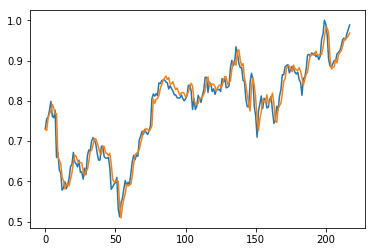

In [24]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={X:train_x, Y:train_y})
        if i % 100 == 0:
            print("[step{}] loss:{}".format(i,step_loss))
    
    test_predict = sess.run(y_pred, feed_dict={X:test_x})
    test_rmse = sess.run(rmse, feed_dict={targets: test_y, predictions: test_predict})
    print("RMSE:{}".format(test_rmse))
    
    plt.figure()
    plt.plot(test_y)
    plt.plot(test_predict)
    plt.show()